In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


In [2]:
data=pd.read_csv('new_data.csv')
consumer=pd.read_csv('customers_info.csv')


In [3]:
cust_id=[]
def convert(x):
  '''
  convert customer id that is string in integer based on referencing in list
  '''
  global cust_id
  if x not in cust_id:
    cust_id.append(x)
  return cust_id.index(x)
data.customer_id = data.customer_id.apply(convert)

In [6]:
data.head()

,customer_id,gender,location_type,longitude,latitude,akeed_order_id,item_count,grand_total,payment_mode,promo_code,...,ven_longitude,vendor_category_en,delivery_charge,serving_distance,is_open,prepration_time,rank,primary_tags,vendor_rating_y,vendor_tag_name
0,0,male,Other,-78.559671,-0.264322,242001.0,1.0,18.7,1,0,...,0.551594,Restaurants,0.0,15.0,1.0,15,1,134,4.3,"American,Burgers,Kids meal,Pasta,Sandwiches,Sm..."
1,0,male,Other,0.449445,-0.264730,242001.0,1.0,18.7,1,0,...,0.551594,Restaurants,0.0,15.0,1.0,15,1,134,4.3,"American,Burgers,Kids meal,Pasta,Sandwiches,Sm..."
2,0,male,Home,0.079665,-1.575867,242001.0,1.0,18.7,1,0,...,0.551594,Restaurants,0.0,15.0,1.0,15,1,134,4.3,"American,Burgers,Kids meal,Pasta,Sandwiches,Sm..."
3,1,male,Other,0.151387,-0.567823,266129.0,1.0,6.0,1,0,...,0.135124,Restaurants,0.7,15.0,1.0,15,1,1065,4.2,"Combos,Fries,Mojitos ,Pasta,Sandwiches"
4,1,male,Home,0.103313,-1.117296,266129.0,1.0,6.0,1,0,...,0.135124,Restaurants,0.7,15.0,1.0,15,1,1065,4.2,"Combos,Fries,Mojitos ,Pasta,Sandwiches"


In [7]:
data.columns

Index(['customer_id', 'gender', 'location_type', 'longitude', 'latitude',
       'akeed_order_id', 'item_count', 'grand_total', 'payment_mode',
       'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating_x', 'vendor_id', 'LOCATION_NUMBER', 'LOCATION_TYPE',
       'CID X LOC_NUM X VENDOR', 'ven_latitude', 'ven_longitude',
       'vendor_category_en', 'delivery_charge', 'serving_distance', 'is_open',
       'prepration_time', 'rank', 'primary_tags', 'vendor_rating_y',
       'vendor_tag_name'],
      dtype='object')

[Text(0.5, 1.0, 'vendor_rating given by customer')]

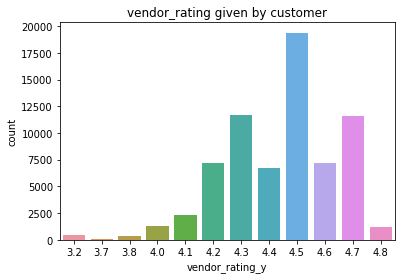

In [8]:
sns.countplot(data['vendor_rating_y']).set(title='vendor_rating given by customer')

Obrsevation- This plot shows that most of the vendors got rating by customers is 4.5 and 4.7 which is quite good ratings.

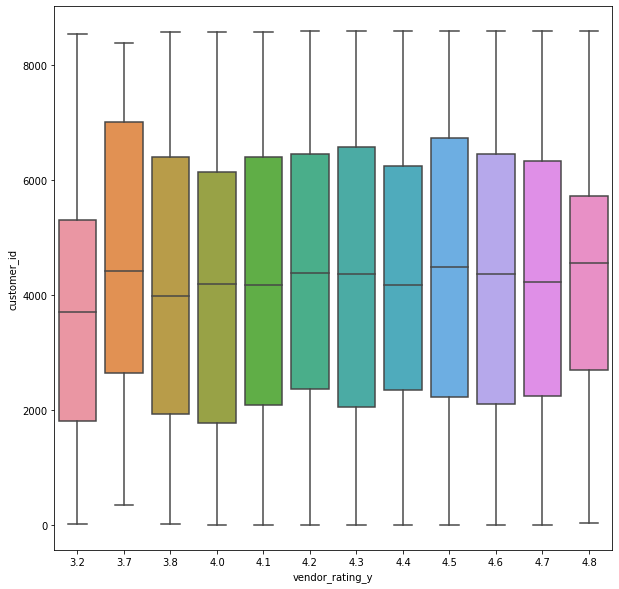

In [9]:
plt.figure(figsize=(10,10))
sns.boxplot(x='vendor_rating_y',y='customer_id',data=data)
plt.show()

Observation- It is clearly seen that more than 50% of data points are overlapping with almost the same median.

<AxesSubplot:xlabel='gender', ylabel='count'>

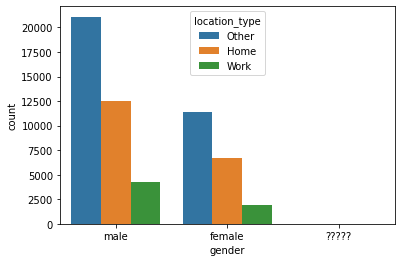

In [10]:
sns.countplot(consumer['gender'],hue=consumer['location_type'])

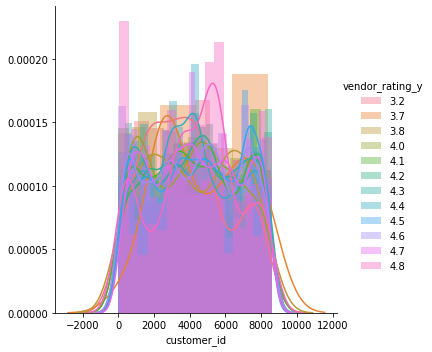

In [11]:
sns.FacetGrid(data, hue="vendor_rating_y", size=5) \
   .map(sns.distplot, "customer_id") \
   .add_legend();
plt.show();

observation- this plot shows the customer_id between 800 to 1000 are using payment mode 5 and 700 to 2000 are using payment mode 3

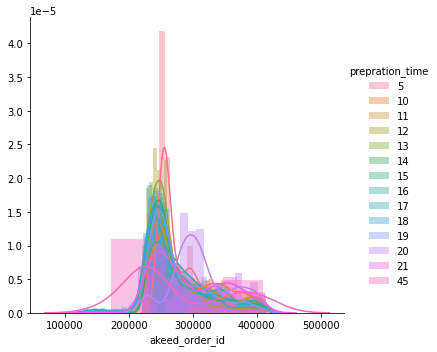

In [12]:
# This plot shows prepartion time for per order
sns.FacetGrid(data, hue="prepration_time", size=5) \
   .map(sns.distplot, "akeed_order_id") \
   .add_legend();
plt.show();

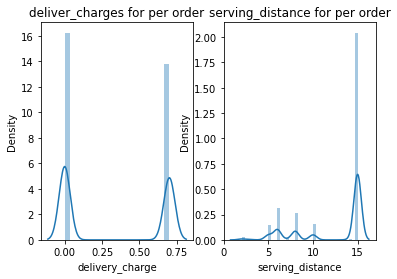

In [13]:
fig,axes=plt.subplots(1,2)
sns.distplot(data.delivery_charge,ax=axes[0]).set(title='deliver_charges for per order')
sns.distplot(data.serving_distance,ax=axes[1]).set(title='serving_distance for per order')
plt.show()

Observation- Above plots shown serving distance and delivery charges for per order.

[0.0061392  0.         0.         0.00657053 0.         0.05196038
 0.2714333  0.09670323 0.38262907 0.18456429]
[3.2  3.36 3.52 3.68 3.84 4.   4.16 4.32 4.48 4.64 4.8 ]


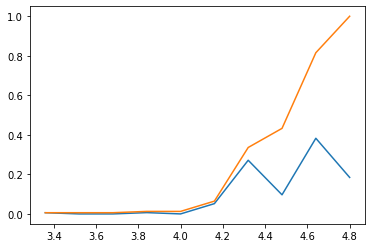

In [14]:
counts, bin_edges = np.histogram(data['vendor_rating_y'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

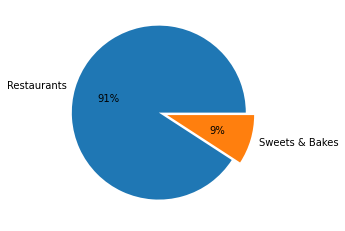

In [15]:
plt.pie(data.vendor_category_en.value_counts(),labels=data.vendor_category_en.unique(),autopct='%1.0f%%',explode=[0.1,0])
plt.show()

observation- This pie chart shows us theire is 91% are restaurant in dataset and 9% are sweets and bakers

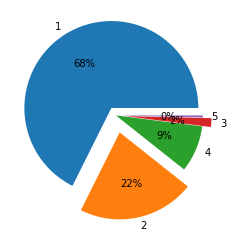

In [16]:
plt.pie(data.payment_mode.value_counts(),labels=data.payment_mode.unique(),autopct='%1.0f%%',explode=[0.1,0.2,0,0.1,0])

plt.show()


Observation- This pie chart shows there are a total of 5 payment modes but most of the customers prefer the type 1 payment mode.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(column, top_nu_of_words, nu_of_word):
    
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    
    bag_of_words = vec.fit_transform(column)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    
    return words_freq[:top_nu_of_words]

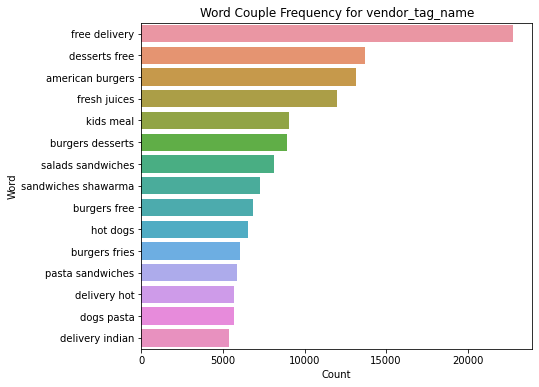

In [20]:
lst = get_top_words(data['vendor_tag_name'], 15, (2,2))
df_words = pd.DataFrame(lst, columns=['Word', 'Count'])
plt.figure(figsize=(7,6))
sns.barplot(data=df_words, x='Count', y='Word')
plt.title('Word Couple Frequency for vendor_tag_name');

observation- Above  plot shows about top 15 words present in vendor tag name

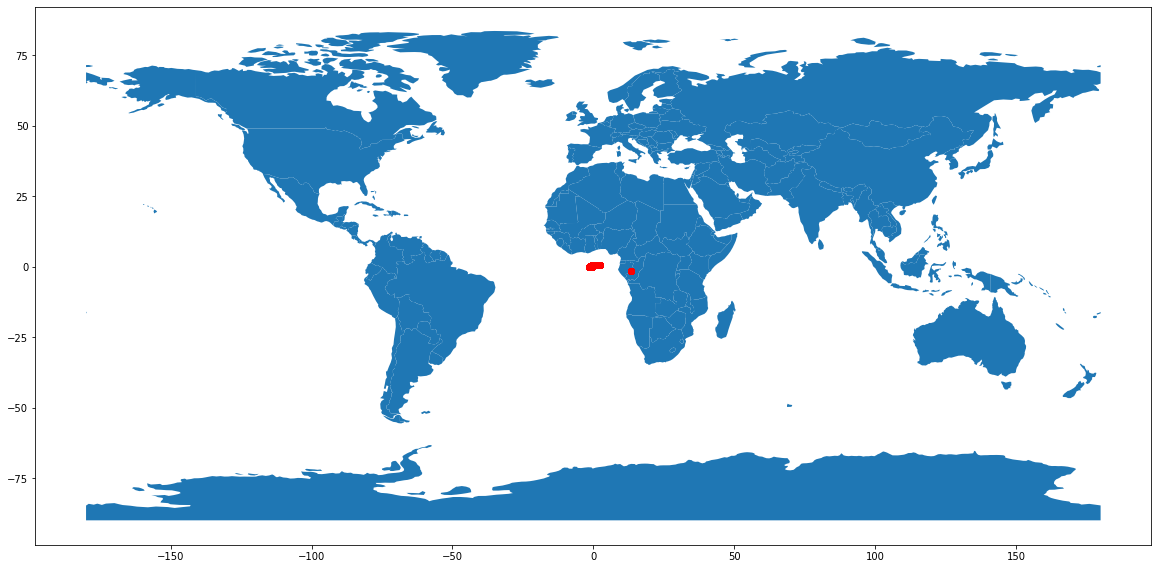

In [24]:
# vendor latitude and longitude
df = data[["ven_latitude","ven_longitude"]]

geometry = [Point(xy) for xy in zip(df['ven_latitude'], df['ven_longitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)), marker='o', color='red', markersize=30);

In [11]:
data[['latitude','longitude']].describe(percentiles=[.01,.05,.1,.25,.5,.9,.95,.99])

,latitude,longitude
count,77972.000000,77972.000000
mean,-0.428090,-26.965974
std,21.597050,37.645758
min,-671.738872,-134.415302
1%,-1.875589,-78.754448
5%,-1.117171,-78.647757
10%,-0.779263,-78.603964
25%,-0.426889,-78.549275
50%,-0.079041,0.020449
90%,0.663894,0.704528


In [33]:
data = data[ data.apply(lambda row: (-1.875589<=row['latitude']<= 1.053774) and (-78.754448<=row['longitude']<=0.785812), axis=1) ]



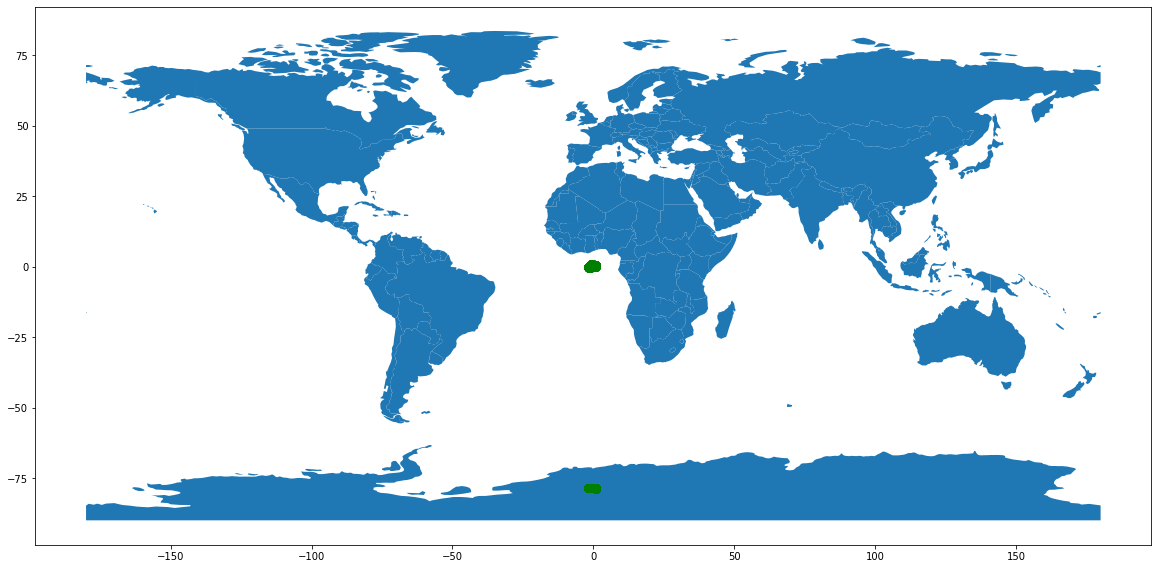

In [19]:
# customer latitude and longitude

df = dat2[["latitude","longitude"]]

geometry = [Point(xy) for xy in zip(df['latitude'], df['longitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)), marker='o', color='green', markersize=50);

In [32]:
data.to_csv('new_data.csv',index=False)